In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# df = pd.read_csv("result_k.csv")
# df2 = pd.read_csv("result_size_2_generated.csv")
# df = pd.concat([df1, df2])
# df.index = [i+1 for i in range(len(df))]

dfs = []

for i in range(1, 3):
    file = "result_size_limit/data_%d.csv"  % (i)
    print(str(file))
    dfs.append(pd.read_csv(file))
df = pd.concat(dfs)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.index = [i+1 for i in range(len(df))]
df

result_size_limit/data_1.csv
result_size_limit/data_2.csv


,k,dslimit,sizeLimit,neg_sup,filename,Number of predicate,Number of test case,Accuracy,Time,Memory
1,25,0.01,1,0,generated_data/data_size_limit.txt,200,40,1.000000,258,96466944
2,25,0.01,2,0,generated_data/data_size_limit.txt,200,40,0.911765,5362,1077007248
3,25,0.01,3,0,generated_data/data_size_limit.txt,200,40,0.935484,223463,6478316256
4,25,0.01,4,0,generated_data/data_size_limit.txt,200,40,0.966667,2122583,6883478488
5,25,0.01,5,0,generated_data/data_size_limit.txt,200,40,0.966667,6887467,7524986176
6,25,0.01,6,0,generated_data/data_size_limit.txt,200,40,0.966667,11208517,8318020096


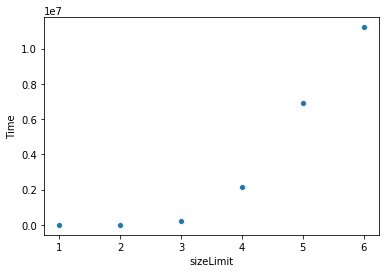

In [24]:
sns.scatterplot(x='sizeLimit', y='Time', data=df)
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

[[ 0.00000000e+00 -2.64624913e+06  6.83864758e+05  2.50074074e+03]]
[2114060.33333341]


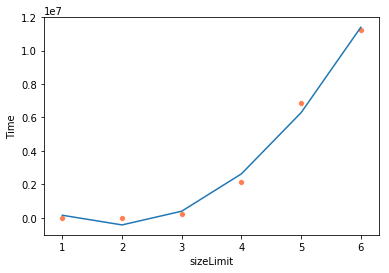

In [26]:
y = np.atleast_2d(df['Time']).T
x = np.atleast_2d(df['sizeLimit']).T

poly = PolynomialFeatures(degree=3)
x_transform = poly.fit_transform(x)

linearRegression = LinearRegression()
linearRegression.fit(x_transform, y)

coeff = linearRegression.coef_.T

result = linearRegression.predict(x_transform)

x_list = [val[0] for val in x]
result_list = [val[0] for val in result]
df_current = pd.DataFrame.from_dict({'x': x_list, 'y': result_list})

print(linearRegression.coef_)
print(linearRegression.intercept_)

sns.lineplot(x='x', y='y', data=df_current)
sns.scatterplot(x='sizeLimit', y='Time', data=df, color="coral")
plt.show()

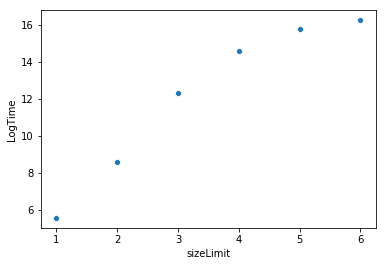

In [46]:
y = np.log(np.atleast_2d(df['Time']).T)
x = np.atleast_2d(df['sizeLimit']).T

sns.scatterplot(x='sizeLimit', y='LogTime', data=df)
plt.show()

[[0.         2.20347522]]
[4.45493604]


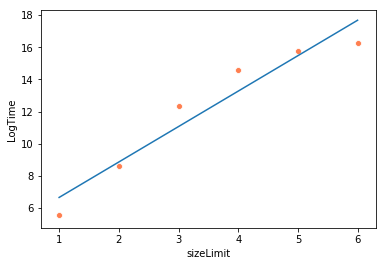

In [39]:


y = np.log(np.atleast_2d(df['Time']).T)
x = np.atleast_2d(df['sizeLimit']).T

df['LogTime'] = y

poly = PolynomialFeatures(degree=1)
x_transform = poly.fit_transform(x)

linearRegression = LinearRegression()
linearRegression.fit(x_transform, y)

coeff = linearRegression.coef_.T

result = linearRegression.predict(x_transform)

x_list = [val[0] for val in x]
result_list = [val[0] for val in result]
df_current = pd.DataFrame.from_dict({'x': x_list, 'y': result_list})

print(linearRegression.coef_)
print(linearRegression.intercept_)

sns.lineplot(x='x', y='y', data=df_current)
sns.scatterplot(x='sizeLimit', y='LogTime', data=df, color="coral")
plt.show()

In [44]:
from math import exp

coeff = linearRegression.coef_[0][1]
intercept = linearRegression.intercept_[0]

print("%f (%f ^ size_limit)" % (exp(coeff), exp(intercept)))

9.056432 (86.050647 ^ size_limit)


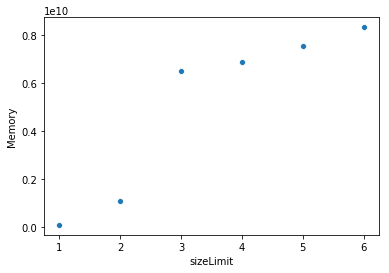

In [27]:
sns.scatterplot(x='sizeLimit', y='Memory', data=df)
plt.show()

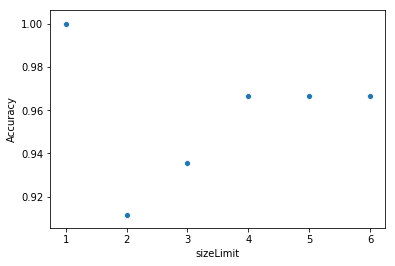

In [28]:
sns.scatterplot(x='sizeLimit', y='Accuracy', data=df)
plt.show()

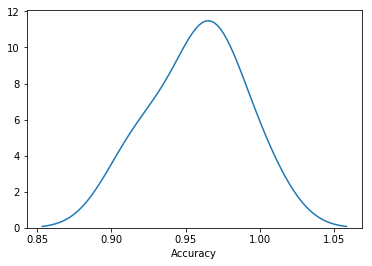

In [29]:
sns.distplot(df['Accuracy'], hist=False)
plt.show()

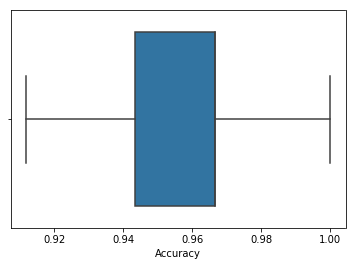

In [30]:
sns.boxplot(df['Accuracy'])
plt.show()

In [31]:
df['Accuracy'].describe()

count    6.000000
mean     0.957875
std      0.030443
min      0.911765
25%      0.943280
50%      0.966667
75%      0.966667
max      1.000000
Name: Accuracy, dtype: float64

In [32]:
from scipy import stats

In [33]:
_, p = stats.normaltest(df['Accuracy'])
print("p-value is",p)
print("confidence is", 1-p)

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

In [ ]:
x_bar = df['Accuracy'].mean()
x_std = df['Accuracy'].std()
x_n = len(df['Accuracy'])

confidence = 0.9
alpha = 1 - confidence
t_alpha_half = stats.t.ppf(1-(alpha/2), x_n - 1) 

delta = t_alpha_half * x_std / x_n
left_limit = x_bar - delta
right_limit = x_bar + delta

print(left_limit, right_limit)